<h1>Cuadernillo de apoyo (catástrofe) de la charla: caos, estabilidad y catástrofe de la XI Jornada de las Matemáticas Universidad Distrital presentado por Arturo Sanjuán.</h1>

Primero llamemos algunas librerías

In [1]:
from sympy import *
from sympy.plotting import plot_parametric, plot3d
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets.widgets import *
%matplotlib inline
init_printing()

Algunas cuentas algebraicas que se podrían hacer a mano

In [2]:
x, r, q, u = symbols('x, r, q, u')

In [3]:
f = q*r*u**2 + q*r - r*u**3 + u*(-q - r)
f

In [4]:
dfu = diff(f, u)
dfu

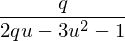

In [5]:
rinqa = solve(dfu,r)[0]
rinqa

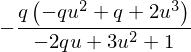

In [6]:
fqarinqa = simplify(f.subs(r,rinqa))
fqarinqa

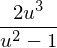

In [7]:
qda = solve(fqarinqa,q)[1]
qda

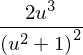

In [8]:
rda = rinqa.subs(q,qda)
factor(simplify(rda))

In [9]:
disc = simplify(discriminant(f, u)/r);
disc

In [10]:
simplify(disc.subs([(q,qda),(r,rda)]))

dibujo de la función de cosecha

In [11]:
def g(s):
    return 2*s**2/(0.01 + s**2)

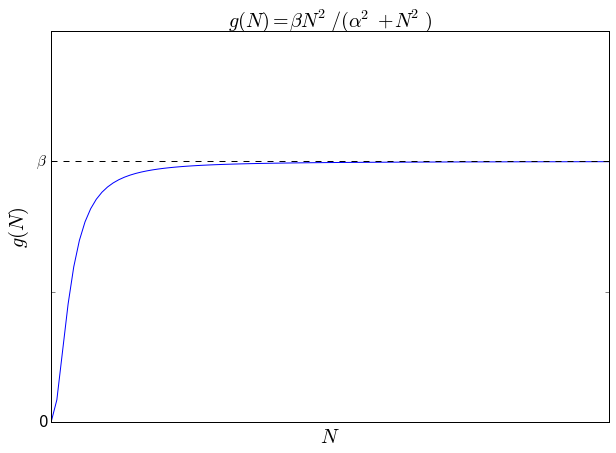

In [12]:
x = np.linspace(0,3,100)
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
#ax.set_xlim([0,20])
ax.set_ylim([0,3])
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['0','',r'$\beta$',''], fontsize = 15)
ax.set_xticks([])
plt.plot(x, g(x), color = 'blue')
plt.plot([0,3],[2,2], linestyle = '--', color = 'black')
ax.set_title(r"$g(N)=\beta N^2/(\alpha^2 + N^2)$", fontsize = 20)
ax.set_ylabel(r'$g(N)$', fontsize = 20)
ax.set_xlabel(r'$N$', fontsize = 20)
plt.savefig('catas1.pdf')

Estudio de los ceros o puntos críticos

In [13]:
np_disc = lambdify([q, r], disc)
def np_disc_lvl(x, y):
    return np.sign(np_disc(x, y))

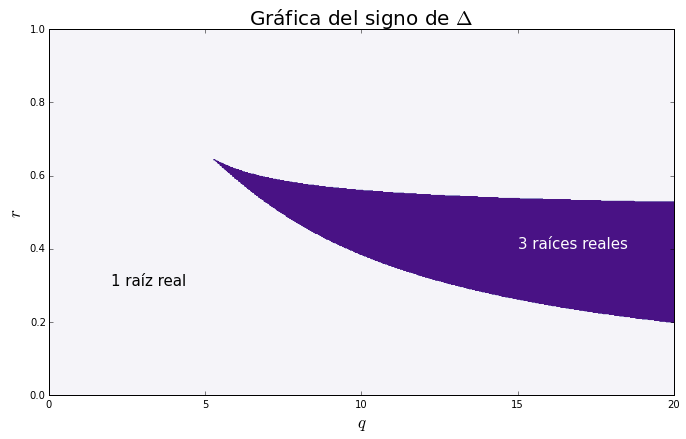

In [14]:
#%matplotlib inline

q1 = np.linspace(0, 20, 500)
r1 = np.linspace(0, 1, 500)
Q1, R1 = np.meshgrid(q1,r1)
fig = plt.figure(figsize = (7*1.6,7))
plt.contourf(Q1, R1, np_disc_lvl(Q1, R1), cmap=cm.Purples)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel(r"$q$", fontsize = 17)
ax.set_ylabel(r"$r$", fontsize = 17)
ax.annotate('1 raíz real', xy=(2, 0.3), fontsize = 15)
ax.annotate('3 raíces reales', xy=(15, 0.4), fontsize = 15, color = 'white')
ax.set_title(r"Gráfica del signo de $\Delta$", fontsize = 20)
fig.savefig('catas2.pdf')

In [15]:
polinomio = lambdify([u, q, r], f*u)

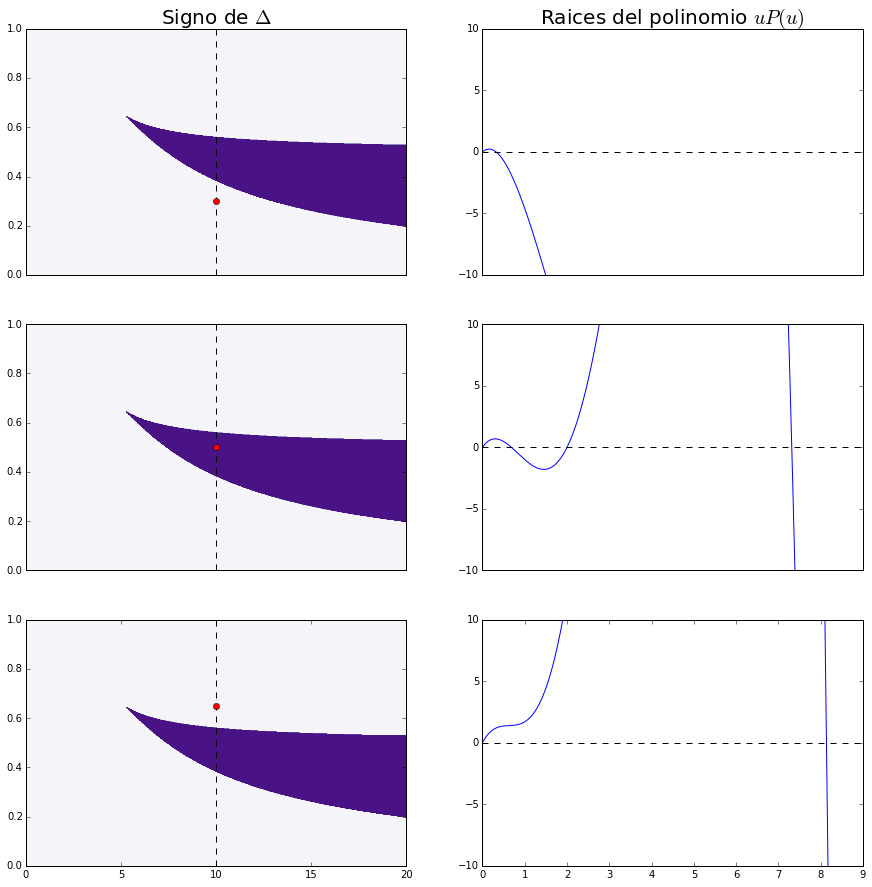

In [16]:
q0 = np.linspace(0, 20, 500)
r0 = np.linspace(0, 1, 500)
x0 = np.linspace(0, 9, 500)
Q, R = np.meshgrid(q0,r0)
fig = plt.figure(figsize = (15,15))
ax = [[None, None], [None, None], [None, None]]
erres = [0.3, 0.5, 0.65]
paso = 0

for i in range(0,3):
    paso = paso + 1
    ax[i][0] = fig.add_subplot(3, 2, paso)
    plt.contourf(Q, R, np_disc_lvl(Q, R), cmap=cm.Purples)
    plt.plot([10,10],[0,1], color = 'black', linestyle = '--')
    plt.plot(10,erres[i], 'bo', color = 'red')
    
    paso = paso + 1
    ax[i][1] = fig.add_subplot(3, 2, paso)
    plt.plot(x0, polinomio(x0, 10, erres[i]))
    ax[i][1].set_ylim([-10,10])
    ax[i][1].set_xlim([0,9])
    plt.plot([0,9],[0,0], color = 'black', linestyle = '--')
    if i != 2:
        ax[i][0].set_xticks([])
        ax[i][1].set_xticks([])

ax[0][0].set_title(r'Signo de $\Delta$', fontsize = 20)
ax[0][1].set_title(r'Raices del polinomio $uP(u)$', fontsize = 20)

fig.savefig('catas3.pdf')

In [17]:
def dibujar_catastrofe(r, q):
    q0 = np.linspace(0, 20, 500)
    r0 = np.linspace(0, 1, 500)
    x0 = np.linspace(0, 9, 500)
    Q, R = np.meshgrid(q0,r0)
    fig = plt.figure(figsize = (10,5))

    ax1 = fig.add_subplot(121)
    plt.contourf(Q, R, np_disc_lvl(Q, R), cmap=cm.Purples)
    plt.plot([q,q],[0,1], color = 'black', linestyle = '--')
    plt.plot(q, r, 'bo', color = 'red')
    ax1.set_title(r'Signo de $\Delta$', fontsize = 20)
   
    ax2 = fig.add_subplot(122)
    plt.plot(x0, polinomio(x0, q, r))
    ax2.set_ylim([-10,10])
    ax2.set_xlim([0,9])
    plt.plot([0,9],[0,0], color = 'black', linestyle = '--')
    ax2.set_title(r'Raices del polinomio $uP(u)$', fontsize = 20)

In [18]:
interact(dibujar_catastrofe, r = FloatSlider(min=0,max=1,step=0.05, value=0.3, description = r'$r$'),\
         q = FloatSlider(min=0,max=20,step=0.1, value=10, description = r'$q$'))

interactive(children=(FloatSlider(value=0.3, description='$r$', max=1.0, step=0.05), FloatSlider(value=10.0, description='$q$', max=20.0), Output()), _dom_classes=('widget-interact',))

<function __main__.dibujar_catastrofe>

Estudio de los ceros

In [19]:
def plot_implicit(fn, bbox=(0,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 200) # resolution of the contour
    B = np.linspace(xmin, xmax, 30) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

In [20]:
np_poly = lambdify([q, r, u], f)

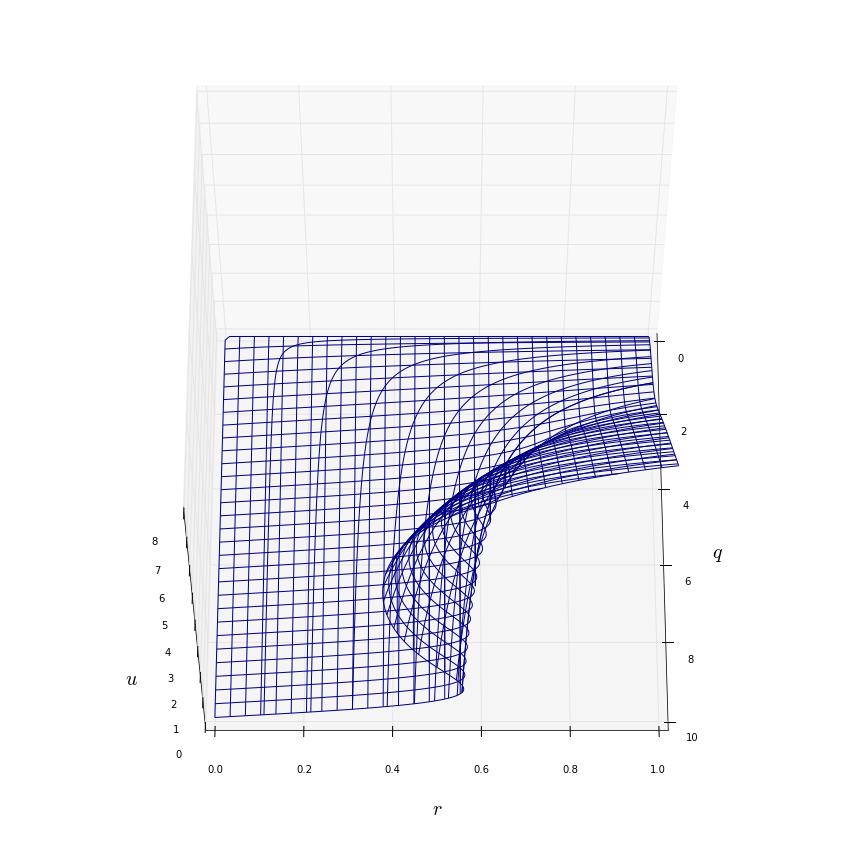

In [21]:
x3 = np.linspace(0,10,100)
y3 = np.linspace(0,1,100)
z3 = np.linspace(0,8,100)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
B1 = np.linspace(0, 1, 10)
B2 = np.linspace(1, 8, 15)
B = np.linspace(0, 10, 30)
C = np.linspace(0,1,30)

X, Y = np.meshgrid(x3, y3)
for z in B1:
    ax.contour(X, Y, np_poly(X, Y, z) + z , [z], zdir='z')

for z in B2:
    ax.contour(X, Y, np_poly(X, Y, z) + z , [z], zdir='z')

X, Z = np.meshgrid(x3, z3)

for y in C:
    ax.contour(X, np_poly(X, y, Z) + y , Z, [y], zdir='y')

    
Y, Z = np.meshgrid(y3, z3)
for x in B:
    ax.contour(np_poly(x, Y, Z) + x , Y, Z, [x], zdir='x')
    
ax.set_zlim3d(0,8)
ax.set_xlim3d(0,10)
ax.set_ylim3d(0,1)
ax.set_xlabel(r"$q$", fontsize = 20)
ax.set_ylabel(r"$r$", fontsize = 20)
ax.set_zlabel(r"$u$", fontsize = 20)
ax.view_init(60, 0)

plt.savefig('catas4.pdf')